# Application of Convolutional Neural Network for happy face image recognition in Keras

## Import the library:

In [18]:
import numpy as np
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils import plot_model
from keras.utils.data_utils import get_file
from keras.utils.vis_utils import model_to_dot
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG

import keras.backend as K
K.set_image_data_format('channels_last')

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

## Load the image data:

In [6]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

##### Show an example of image:

y = 1


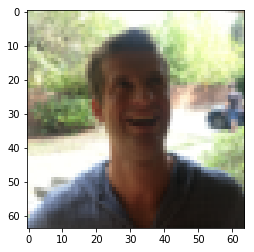

In [10]:
index = 3
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))  # happy: label y=1, unhappy: label y=0

In [11]:
# Normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## Build a Convolutional Neural Network model in Keras:

##### Model definition:

In [12]:
def HappyModel(input_shape):
    """
    Implementation of the CNN model for happy face recognition.
    
    Arguments:
    input_shape -- shape of the images of the dataset (n_Hi, n_Wi, n_Ci)

    Returns:
    model -- a Model() instance in Keras
    
    """   
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)             #'axis=3' refer to the color channel
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model. This creates the Keras model instance, this instance will be used to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
   
    return model

##### Create the model:

In [13]:
happyModel = HappyModel((X_train.shape[1], X_train.shape[2], X_train.shape[3]))

##### Compile the model to configure the learning process:

In [14]:
happyModel.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

##### Train the model. Choose the number of epochs and the batch size:

In [16]:
happyModel.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16)

Epoch 1/20
600/600 [==============================] - 12s 20ms/step - loss: 0.0809 - acc: 0.9750
Epoch 2/20
600/600 [==============================] - 12s 20ms/step - loss: 0.1398 - acc: 0.9467
Epoch 3/20
600/600 [==============================] - 12s 20ms/step - loss: 0.4182 - acc: 0.8700
Epoch 4/20
600/600 [==============================] - 12s 20ms/step - loss: 0.1274 - acc: 0.9567
Epoch 5/20
600/600 [==============================] - 13s 22ms/step - loss: 0.0549 - acc: 0.9800
Epoch 6/20
600/600 [==============================] - 13s 21ms/step - loss: 0.1029 - acc: 0.9717
Epoch 7/20
600/600 [==============================] - 12s 21ms/step - loss: 0.0650 - acc: 0.9817
Epoch 8/20
600/600 [==============================] - 12s 20ms/step - loss: 0.0733 - acc: 0.9767
Epoch 9/20
600/600 [==============================] - 12s 20ms/step - loss: 0.2611 - acc: 0.9200
Epoch 10/20
600/600 [==============================] - 12s 20ms/step - loss: 0.0850 - acc: 0.9733
Epoch 11/20
600/600 [========

##### Evaluate the model with test set:

In [17]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 9ms/step
Loss = 0.18424415310223896
Test Accuracy = 0.9199999976158142


## Apply the trained CNN model for prediction:

This is a happy face!


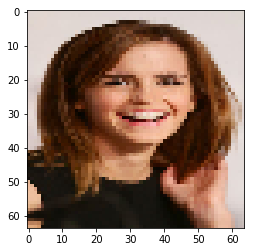

In [21]:
img_path = 'images/Emma.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

if np.squeeze(happyModel.predict(x)) == 1:
    print("This is a happy face!")
else:
    print("This is an unhappy face, why not smile?")    

This is an unhappy face, why not smile?


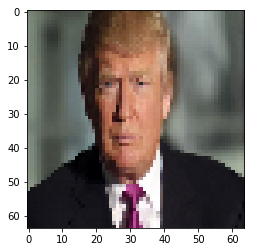

In [25]:
img_path = 'images/Trump.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

if np.squeeze(happyModel.predict(x)) == 1:
    print("This is a happy face!")
else:
    print("This is an unhappy face, why not smile?")  

## View the detail of the Keras model:

In [26]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________